In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd

In [2]:
x = pd.Series([30,45,65,80,97,60,20,13,19])
y = pd.Series([150,123,150,178,186,168,87,60,92])
x_org_std = x.std()
x_org_mean = x.mean()
x = (x - x_org_mean) / x_org_std
x = np.c_[np.ones(x.shape[0]), x] 

In [3]:
alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with


#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = np.sqrt(1/(2*m) * np.dot(error.T, error))
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

# Run Gradient Descent
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))


Gradient Descent: 132.67, 40.03


In [7]:
#Animation

#Set the plot up,
fig = plt.figure(figsize=(12,7))
# fig = plt.figure()

ax = plt.axes()
plt.title('Linear Regression Animation')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.scatter(x[:,1], y, color='blue')
line, = ax.plot([], [], lw=2,color='red')
annotation = ax.annotate("Start",(0.65, 0.15), xycoords='figure fraction')
#annotation = ax.text(0,0,'')
# ax = fig.add_subplot(111)
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Loss = {}, w= {}, b ={}'.format(
        round(past_costs[i],3),
        round(past_thetas[i][1],3),
        round(past_thetas[i][0],3)
    ))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=0, blit=True)
# ax.axis([-5, 20, min(y), max(y)])
anim.save('animation.gif', writer='imagemagick', fps = 30)

In [8]:
annotation

Text(0.65, 0.15, 'Loss = 12.995, w= 40.03, b =132.661')


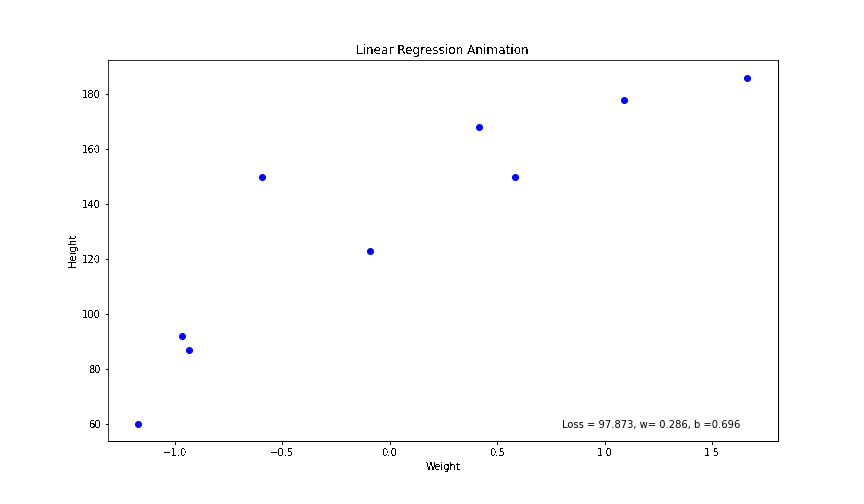

In [9]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

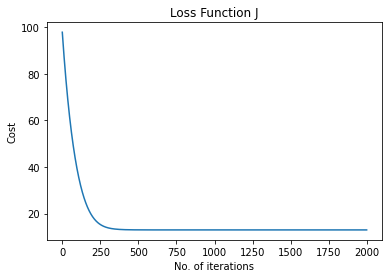

In [10]:
#Plot the cost function...
plt.title('Loss Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()